In [9]:
!pip install --upgrade numpy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    U

In [1]:
# 🛠️ SETUP
!pip install PyPDF2 pandas nltk spacy gensim scikit-learn matplotlib seaborn -q
import nltk
nltk.download('stopwords')
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 112.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# 📚 IMPORTS
import os
import re
import PyPDF2
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# 🔧 INIT
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")


In [4]:
from google.colab import files
uploaded = files.upload()

Saving ENG_PDF.zip to ENG_PDF.zip


In [5]:
df_meta=pd.read_excel('ALL_metadata.xlsx')
df_meta.head()

,Unnamed: 0,ETid,Country,Authority,Date of Decision,Fine [€],Controller/Processor,Sector,Quoted Art.,Type,Summary,Source1,Source2
0,NaN,ETid-2039,HUNGARY,Hungarian National Authority for Data Protecti...,2023-06-22 00:00:00,205000,Digi Telecommunications and Services Ltd.,"Media, Telecoms and Broadcasting","Art. 5 (1) a) GDPR, Art. 32 (1), (2) GDPR",Insufficient technical and organisational meas...,The Hungarian DPA has imposed a fine of EUR 20...,link,https://www.enforcementtracker.com/ETid-2039 (...
1,NaN,ETid-1825,HUNGARY,Hungarian National Authority for Data Protecti...,2022,2700,Credit institution,"Finance, Insurance and Consulting","Art. 6 (1) GDPR, Art. 5 (2) GDPR",Insufficient legal basis for data processing,"The Hungarian DPA has imposed a fine of EUR 2,...",link,https://www.enforcementtracker.com/ETid-1825 (...
2,NaN,ETid-1824,HUNGARY,Hungarian National Authority for Data Protecti...,2023-02-06 00:00:00,80500,I&S Limited Kft,Accomodation and Hospitalty,"Art. 5 (1) a), b) GDPR, Art. 6 (1) GDPR, Art. ...",Non-compliance with general data processing pr...,The Hungarian DPA has imposed a fine of EUR 80...,link,https://www.enforcementtracker.com/ETid-1824 (...
3,NaN,ETid-1823,HUNGARY,Hungarian National Authority for Data Protecti...,2022,1400,Dentist,Health Care,Unknown,Non-compliance with general data processing pr...,"The Hungarian DPA has fined a dentist EUR 1,30...",link,https://www.enforcementtracker.com/ETid-1823 (...
4,NaN,ETid-1822,HUNGARY,Hungarian National Authority for Data Protecti...,2022-04-22 00:00:00,8000,Political party,Individuals and Private Associations,"Art. 5 (2) GDPR, Art. 32 (1) a), b) GDPR, Art....",Insufficient technical and organisational meas...,"The Hungarian DPA has imposed a fine of EUR 8,...",link link,https://www.enforcementtracker.com/ETid-1822 (...


In [6]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            0 non-null      float64
 1   ETid                  116 non-null    object 
 2   Country               116 non-null    object 
 3   Authority             116 non-null    object 
 4   Date of Decision      116 non-null    object 
 5   Fine [€]              116 non-null    object 
 6   Controller/Processor  116 non-null    object 
 7   Sector                116 non-null    object 
 8   Quoted Art.           116 non-null    object 
 9   Type                  116 non-null    object 
 10  Summary               116 non-null    object 
 11  Source1               116 non-null    object 
 12  Source2               116 non-null    object 
dtypes: float64(1), object(12)
memory usage: 11.9+ KB


In [7]:
df_meta['Fine [€]'].unique()

array([205000, 2700, 80500, 1400, 8000, 80700, 1300, 1600, 253000, 13300,
       26700, 5200, 197000, 1500, 72500, 1200, 735, 634000, 13500, 843,
       28400, 2800, 570, 1425, 27700, 22200, 97150, 28, 1385, 55400, 1940,
       54800, 1700, 560, 288000, 1450, 5800, 2890, 870, 290, 2860, 1715,
       4290, 8575, 2850, 2000, 286, 1430, 7400, 15100, 15150, 92146, 1900,
       9400, 34375, 3200, 1560, 70300, 3500000, 904000, 8700, 400000,
       14500000, 5033000, 1547000, 91000, 9000000, 115000, 585000, 11800,
       29000, 1405000, 320000, 20450000, 22046000, 251000000, 310000000,
       91000000, 345000000, 22500, 1200000000, 750000, 15000, 460000,
       5500000, 100000, 390000000, 5000, 265000000, 405000000, 463000,
       17000000, 110000, 60000, 'Only intention to issue fine', 225000000,
       90000, 85000, 70000, 450000, 65000, 40000, 75000], dtype=object)

In [11]:
df_meta['Fine [€]'].replace('Only intention to issue fine', 0, inplace=True)

<ipython-input-11-ed8caeb34281>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_meta['Fine [€]'].replace('Only intention to issue fine', 0, inplace=True)
<ipython-input-11-ed8caeb34281>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meta['Fine [€]'].replace('Only intention to issue fine', 0

In [12]:
df_meta['Quoted Art.'].unique()

array(['Art. 5 (1) a) GDPR, Art. 32 (1), (2) GDPR',
       'Art. 6 (1) GDPR, Art. 5 (2) GDPR',
       'Art. 5 (1) a), b) GDPR, Art. 6 (1) GDPR, Art. 9 (2) GDPR, Art. 13 (1), (2) GDPR, Art. 24 GDPR, Art. 25 GDPR',
       'Unknown',
       'Art. 5 (2) GDPR, Art. 32 (1) a), b) GDPR, Art. 32 (2) GDPR',
       'Art. 5 (1) a), b) GDPR, Art. 6 (1) GDPR, Art. 7 (2) GDPR, Art. 12 (1) GDPR, Art. 13 GDPR',
       'Art. 5 (1) a) GDPR, Art. 12 (2), (3) GDPR, Art. 31 GDPR',
       'Art. 5 (1) a) GDPR, Art. 12 (2) GDPR, Art. 13 (1) GDPR',
       'Art. 5 (1) e) GDPR, Art. 6 (1) GDPR, Art. 12 GDPR, Art. 13 GDPR, Art. 31 GDPR',
       'Art. 12 GDPR, Art. 13 GDPR',
       'Art. 5 (1) a), b) GDPR, Art. 6 (1) GDPR, Art. 12 (1) GDPR, Art. 13 GDPR',
       'Art. 6 (1) GDPR, Art. 7 (2), 4) GDPR, Art. 12 GDPR',
       'Art. 5 (1) b) GDPR, Art. 6 (1) GDPR, Art. 12 (1) GDPR, Art. 14 GDPR',
       'Art. 5 (1) GDPR, Art. 12 (2) GDPR, Art. 13 (1) GDPR',
       'Art. 5 (2) GDPR, Art. 6 (1) GDPR, Art. 12 (1) GDPR',
 

In [13]:
# Step 1: Clean metadata - drop 'Unnamed', 'Source1', 'Source2'
metadata_df_cleaned = df_meta.drop(columns=[col for col in df_meta.columns if 'Unnamed' in col or col in ['Source1', 'Source2']])

# Step 2: Normalize 'Quoted Art.' column by splitting and exploding
metadata_df_cleaned['Quoted Art.'] = metadata_df_cleaned['Quoted Art.'].fillna('Unknown')
metadata_df_cleaned['Quoted Art.'] = metadata_df_cleaned['Quoted Art.'].str.replace('Art. ', '', regex=False)
metadata_df_cleaned['Quoted Art.'] = metadata_df_cleaned['Quoted Art.'].str.split(', ')
metadata_exploded = metadata_df_cleaned.explode('Quoted Art.')
metadata_exploded['Quoted Art.'] = 'Art. ' + metadata_exploded['Quoted Art.'].str.strip()

# Step 3: Create a simplified version
# Keep only the base article (e.g., 'Art. 5', 'Art. 6') and remove subpoints like (1), (2), a), b), etc.
metadata_exploded['Quoted Art. Simple'] = metadata_exploded['Quoted Art.'].str.extract(r'(Art\.\s*\d+)')
metadata_exploded['Quoted Art. Simple'] = metadata_exploded['Quoted Art. Simple'].fillna(method='ffill')

<ipython-input-13-6b4ef04575c5>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata_exploded['Quoted Art. Simple'] = metadata_exploded['Quoted Art. Simple'].fillna(method='ffill')


In [14]:
metadata_exploded.head()

,ETid,Country,Authority,Date of Decision,Fine [€],Controller/Processor,Sector,Quoted Art.,Type,Summary,Quoted Art. Simple
0,ETid-2039,HUNGARY,Hungarian National Authority for Data Protecti...,2023-06-22 00:00:00,205000,Digi Telecommunications and Services Ltd.,"Media, Telecoms and Broadcasting",Art. 5 (1) a) GDPR,Insufficient technical and organisational meas...,The Hungarian DPA has imposed a fine of EUR 20...,Art. 5
0,ETid-2039,HUNGARY,Hungarian National Authority for Data Protecti...,2023-06-22 00:00:00,205000,Digi Telecommunications and Services Ltd.,"Media, Telecoms and Broadcasting",Art. 32 (1),Insufficient technical and organisational meas...,The Hungarian DPA has imposed a fine of EUR 20...,Art. 32
0,ETid-2039,HUNGARY,Hungarian National Authority for Data Protecti...,2023-06-22 00:00:00,205000,Digi Telecommunications and Services Ltd.,"Media, Telecoms and Broadcasting",Art. (2) GDPR,Insufficient technical and organisational meas...,The Hungarian DPA has imposed a fine of EUR 20...,Art. 32
1,ETid-1825,HUNGARY,Hungarian National Authority for Data Protecti...,2022,2700,Credit institution,"Finance, Insurance and Consulting",Art. 6 (1) GDPR,Insufficient legal basis for data processing,"The Hungarian DPA has imposed a fine of EUR 2,...",Art. 6
1,ETid-1825,HUNGARY,Hungarian National Authority for Data Protecti...,2022,2700,Credit institution,"Finance, Insurance and Consulting",Art. 5 (2) GDPR,Insufficient legal basis for data processing,"The Hungarian DPA has imposed a fine of EUR 2,...",Art. 5


In [15]:
# Group by simplified article and calculate summary statistics
article_summary = metadata_exploded.groupby('Quoted Art. Simple').agg(
    total_fines=('Fine [€]', 'sum'),
    average_fine=('Fine [€]', 'mean'),
    case_count=('Fine [€]', 'count')
).reset_index().sort_values(by='total_fines', ascending=False)

print(article_summary)

   Quoted Art. Simple  total_fines  average_fine  case_count
20             Art. 5   2602696520  2.478759e+07         105
10            Art. 25   2533638190  1.333494e+08          19
21             Art. 6   1743245624  3.631762e+07          48
0             Art. 12   1386453068  3.747170e+07          37
1             Art. 13   1294365156  3.498284e+07          37
19            Art. 46   1200000000  1.200000e+09           1
9             Art. 24    767818040  6.980164e+07          11
15            Art. 33    685722586  4.033662e+07          17
2             Art. 14    544832715  9.080545e+07           6
17            Art. 35    414000000  2.070000e+08           2
14            Art. 32    150110835  3.335796e+06          45
23             Art. 9     10770193  1.538599e+06           7
7             Art. 21     10269400  2.567350e+06           4
3             Art. 15      9179428  1.019936e+06           9
5             Art. 17      9049650  1.508275e+06           6
8             Art. 22   

<ipython-input-50-4b9d769dd567>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='total_fines', y='Quoted Art. Simple', palette='Greens_d', ax=ax1)
<ipython-input-50-4b9d769dd567>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='total_fines', y='Quoted Art. Simple', palette='Reds_d', ax=ax2)


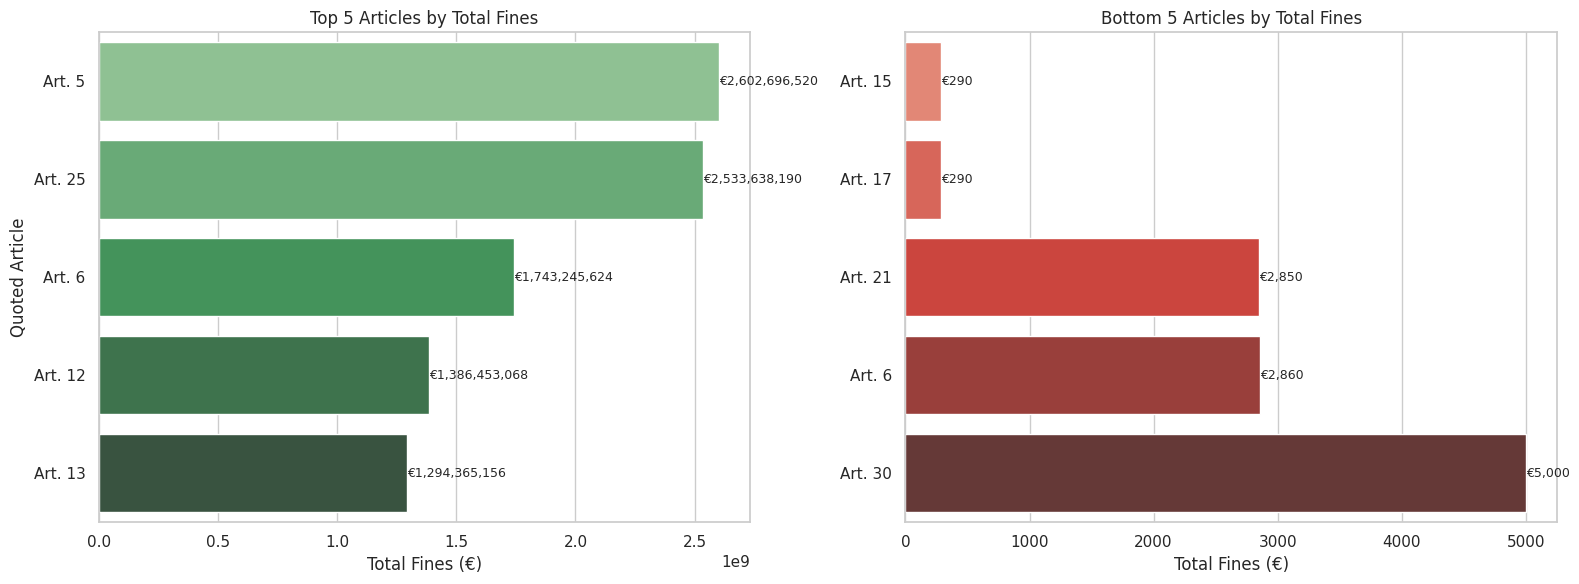

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top and bottom 5
top5 = article_summary.nlargest(5, 'total_fines')
bottom5 = article_summary.nsmallest(5, 'total_fines')

sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 5
sns.barplot(data=top5, x='total_fines', y='Quoted Art. Simple', palette='Greens_d', ax=ax1)
ax1.set_title('Top 5 Articles by Total Fines')
ax1.set_xlabel('Total Fines (€)')
ax1.set_ylabel('Quoted Article')
for bar, value in zip(ax1.patches, top5['total_fines']):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"€{value:,.0f}",
             va='center', ha='left', fontsize=9)

# Bottom 5
sns.barplot(data=bottom5, x='total_fines', y='Quoted Art. Simple', palette='Reds_d', ax=ax2)
ax2.set_title('Bottom 5 Articles by Total Fines')
ax2.set_xlabel('Total Fines (€)')
ax2.set_ylabel('')
for bar, value in zip(ax2.patches, bottom5['total_fines']):
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"€{value:,.0f}",
             va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-51-5fba7728d01a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='average_fine', y='Quoted Art. Simple', palette='Greens_d', ax=ax1)
<ipython-input-51-5fba7728d01a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='average_fine', y='Quoted Art. Simple', palette='Reds_d', ax=ax2)


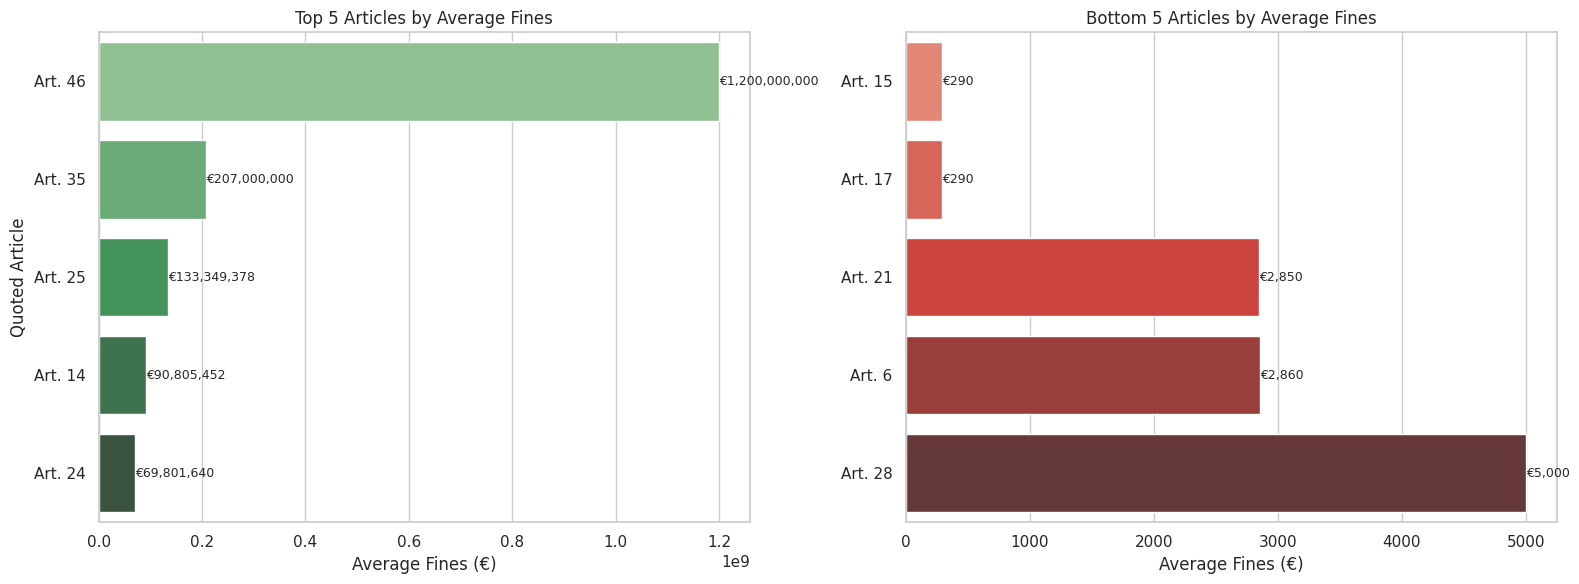

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top and bottom 5
top5 = article_summary.nlargest(5, 'average_fine')
bottom5 = article_summary.nsmallest(5, 'average_fine')

sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 5
sns.barplot(data=top5, x='average_fine', y='Quoted Art. Simple', palette='Greens_d', ax=ax1)
ax1.set_title('Top 5 Articles by Average Fines')
ax1.set_xlabel('Average Fines (€)')
ax1.set_ylabel('Quoted Article')
for bar, value in zip(ax1.patches, top5['average_fine']):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"€{value:,.0f}",
             va='center', ha='left', fontsize=9)

# Bottom 5
sns.barplot(data=bottom5, x='average_fine', y='Quoted Art. Simple', palette='Reds_d', ax=ax2)
ax2.set_title('Bottom 5 Articles by Average Fines')
ax2.set_xlabel('Average Fines (€)')
ax2.set_ylabel('')
for bar, value in zip(ax2.patches, bottom5['average_fine']):
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"€{value:,.0f}",
             va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


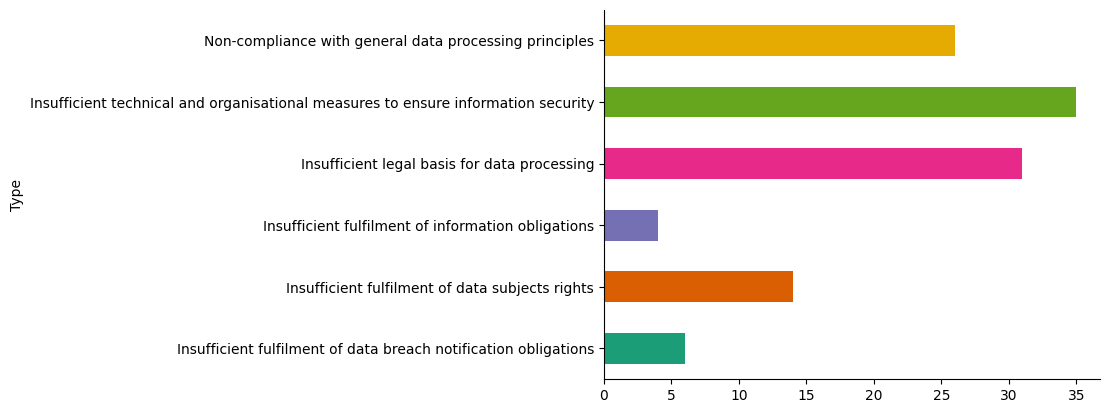

In [16]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
metadata_df_cleaned.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

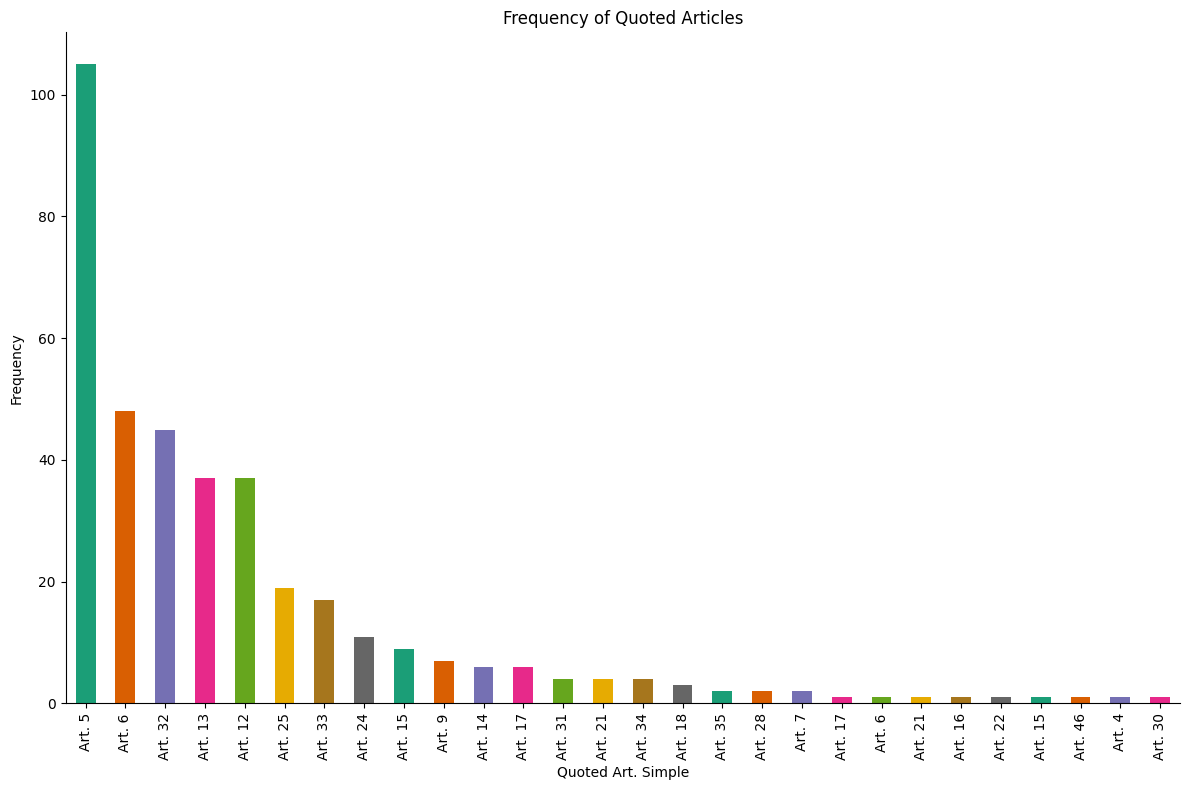

In [17]:
plt.figure(figsize=(12, 8))

# Count the occurrences of each article and plot as bar
article_counts = metadata_exploded['Quoted Art. Simple'].value_counts()

article_counts.plot(
    kind='bar',
    color=sns.color_palette('Dark2')
)

# Add labels and title
plt.title('Frequency of Quoted Articles')
plt.xlabel('Quoted Art. Simple')
plt.ylabel('Frequency')

# Improve readability
plt.xticks(rotation=90)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
# Unzip the uploaded zip file (replace with your zip name)
!unzip ENG_PDF.zip -d gdpr_pdfs

Archive:  ENG_PDF.zip
  inflating: gdpr_pdfs/ETid-689.pdf  
  inflating: gdpr_pdfs/ETid-752.pdf  
  inflating: gdpr_pdfs/ETid-820.pdf  
  inflating: gdpr_pdfs/ETid-875.pdf  
  inflating: gdpr_pdfs/ETid-893.pdf  
  inflating: gdpr_pdfs/ETid-930.pdf  
  inflating: gdpr_pdfs/ETid-987.pdf  
  inflating: gdpr_pdfs/ETid-1009.pdf  
  inflating: gdpr_pdfs/ETid-1188.pdf  
  inflating: gdpr_pdfs/ETid-1190.pdf  
  inflating: gdpr_pdfs/ETid-1250.pdf  
  inflating: gdpr_pdfs/ETid-1373.pdf  
  inflating: gdpr_pdfs/ETid-1422.pdf  
  inflating: gdpr_pdfs/ETid-1461.pdf  
  inflating: gdpr_pdfs/ETid-1543.pdf  
  inflating: gdpr_pdfs/ETid-1564.pdf  
  inflating: gdpr_pdfs/ETid-1578.pdf  
  inflating: gdpr_pdfs/ETid-1666.pdf  
  inflating: gdpr_pdfs/ETid-1677.pdf  
  inflating: gdpr_pdfs/ETid-1696.pdf  
  inflating: gdpr_pdfs/ETid-1844.pdf  
  inflating: gdpr_pdfs/ETid-1965.pdf  
  inflating: gdpr_pdfs/ETid-2032.pdf  
  inflating: gdpr_pdfs/ETid-2317.pdf  
  inflating: gdpr_pdfs/ETid-2555.pdf  
  inflatin

In [19]:
# 📥 1. Extract text from PDFs
def extract_text_from_pdfs(pdf_dir):
    texts = {}
    for filename in os.listdir(pdf_dir):
        if filename.endswith('.pdf'):
            with open(os.path.join(pdf_dir, filename), 'rb') as f:
                reader = PyPDF2.PdfReader(f)
                text = " ".join(page.extract_text() for page in reader.pages)
                texts[filename] = text
    return texts

# Replace with your path
pdf_dir = 'gdpr_pdfs'  # Adjust if needed
texts = extract_text_from_pdfs(pdf_dir)
print(f"Extracted {len(texts)} PDF(s). Sample:\n{list(texts.keys())[:2]}")


[0, IndirectObject(351, 0, 136166507383120)]
[0, IndirectObject(354, 0, 136166507383120)]
[0, IndirectObject(357, 0, 136166507383120)]
[0, IndirectObject(360, 0, 136166507383120)]
[0, IndirectObject(363, 0, 136166507383120)]
[0, IndirectObject(366, 0, 136166507383120)]
[0, IndirectObject(369, 0, 136166507383120)]
[0, IndirectObject(372, 0, 136166507383120)]
[0, IndirectObject(378, 0, 136166507383120)]
[0, IndirectObject(381, 0, 136166507383120)]
[0, IndirectObject(385, 0, 136166507383120)]
[0, IndirectObject(388, 0, 136166507383120)]
[0, IndirectObject(391, 0, 136166507383120)]
[0, IndirectObject(394, 0, 136166507383120)]
[0, IndirectObject(399, 0, 136166507383120)]
[0, IndirectObject(404, 0, 136166507383120)]
[0, IndirectObject(407, 0, 136166507383120)]
[0, IndirectObject(3994, 0, 136166469940368)]
[0, IndirectObject(3989, 0, 136166469940368)]
[0, IndirectObject(3984, 0, 136166469940368)]
[0, IndirectObject(3979, 0, 136166469940368)]
[0, IndirectObject(3974, 0, 136166469940368)]
[0, I

Extracted 33 PDF(s). Sample:
['ETid-752.pdf', 'ETid-1190.pdf']


In [20]:
# 🧼 2. Clean text and tokenize
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stop_words and len(word) > 3]
    return tokens


In [25]:
# 🔎 3. Keyword frequency analysis
def keyword_frequency(text, keywords):
    return {kw: text.lower().count(kw) for kw in keywords}

keywords = ['monitoring', 'encryption', 'access control', 'destruct', 'logging', 'transfer',
            'privacy', 'rights', 'vulnerability', 'audit', 'personal data', 'breach', 'risk']

keyword_df = pd.DataFrame(
    [keyword_frequency(text, keywords) for text in texts.values()],
    index=texts.keys()
)
keyword_df.to_csv('keyword_frequency.csv')
keyword_df.style.background_gradient(cmap='Blues')

,monitoring,encryption,access control,destruct,logging,transfer,privacy,rights,vulnerability,audit,personal data,breach,risk
ETid-752.pdf,0,2,1,3,0,1,4,7,3,1,24,1,12
ETid-1190.pdf,15,0,0,0,0,2,3,11,0,0,72,5,5
ETid-1422.pdf,0,0,0,1,0,1,7,5,0,0,32,14,5
ETid-1696.pdf,0,0,0,0,0,0,0,0,0,0,0,0,0
ETid-1461.pdf,2,1,2,5,1,1,3,12,19,1,82,32,32
ETid-485.pdf,1,0,0,8,2,0,22,15,9,8,346,1138,147
ETid-2032.pdf,0,0,0,0,0,0,0,0,0,0,0,0,0
ETid-1666.pdf,0,3,2,6,1,1,2,31,0,5,122,80,96
ETid-278.pdf,0,2,2,0,0,0,13,21,0,0,101,101,68
ETid-1578.pdf,3,1,0,1,0,3,54,36,0,0,166,20,15


In [26]:
keywords_df = pd.read_csv('keyword_frequency.csv')

In [27]:
keywords_df.head()

,Unnamed: 0,monitoring,encryption,access control,destruct,logging,transfer,privacy,rights,vulnerability,audit,personal data,breach,risk
0,ETid-752.pdf,0,2,1,3,0,1,4,7,3,1,24,1,12
1,ETid-1190.pdf,15,0,0,0,0,2,3,11,0,0,72,5,5
2,ETid-1422.pdf,0,0,0,1,0,1,7,5,0,0,32,14,5
3,ETid-1696.pdf,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ETid-1461.pdf,2,1,2,5,1,1,3,12,19,1,82,32,32


In [28]:
metadata_exploded['ETid'] = metadata_exploded['ETid'].astype(str).str.strip() + '.pdf'

merged_df = metadata_exploded.merge(keywords_df, left_on='ETid', right_on='Unnamed: 0')

In [30]:
merged_df.head()

,ETid,Country,Authority,Date of Decision,Fine [€],Controller/Processor,Sector,Quoted Art.,Type,Summary,...,destruct,logging,transfer,privacy,rights,vulnerability,audit,personal data,breach,risk
0,ETid-2566.pdf,UNITED KINGDOM,Information Commissioner (ICO),45761,70300,DPP Law Ltd.,"Finance, Insurance and Consulting",Art. 5 (1) f) GDPR,Insufficient technical and organisational meas...,"The UK DPA (ICO) has imposed a fine of £ 60,00...",...,3,0,1,3,15,1,7,67,47,47
1,ETid-2566.pdf,UNITED KINGDOM,Information Commissioner (ICO),45761,70300,DPP Law Ltd.,"Finance, Insurance and Consulting",Art. 32 (1),Insufficient technical and organisational meas...,"The UK DPA (ICO) has imposed a fine of £ 60,00...",...,3,0,1,3,15,1,7,67,47,47
2,ETid-2566.pdf,UNITED KINGDOM,Information Commissioner (ICO),45761,70300,DPP Law Ltd.,"Finance, Insurance and Consulting",Art. (2) GDPR,Insufficient technical and organisational meas...,"The UK DPA (ICO) has imposed a fine of £ 60,00...",...,3,0,1,3,15,1,7,67,47,47
3,ETid-2566.pdf,UNITED KINGDOM,Information Commissioner (ICO),45761,70300,DPP Law Ltd.,"Finance, Insurance and Consulting",Art. 33 (1) GDPR,Insufficient technical and organisational meas...,"The UK DPA (ICO) has imposed a fine of £ 60,00...",...,3,0,1,3,15,1,7,67,47,47
4,ETid-2561.pdf,UNITED KINGDOM,Information Commissioner (ICO),45742,3500000,Advanced Computer Software Group Ltd,Health Care,Art. 32 (1) GDPR,Insufficient technical and organisational meas...,The UK DPA (ICO) has fined Advanced Computer S...,...,0,0,0,0,0,0,0,0,0,0


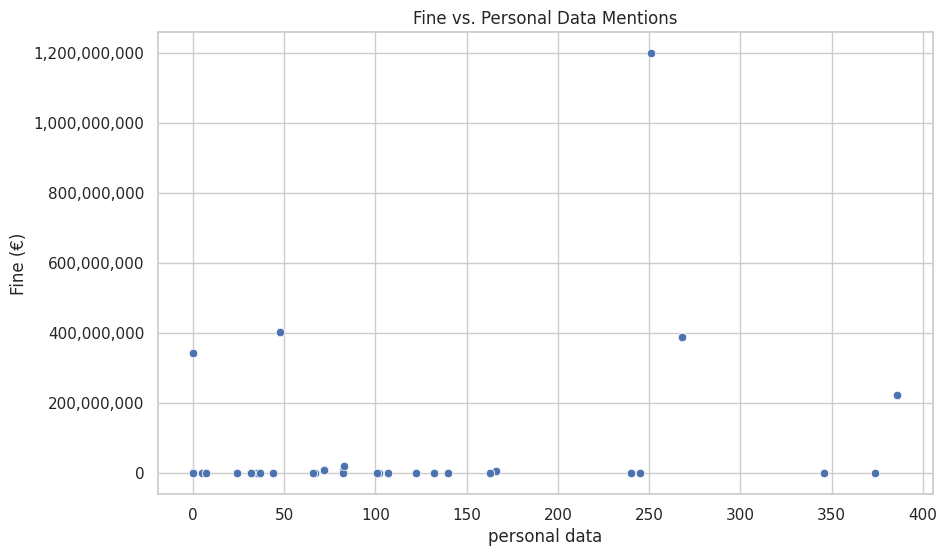

In [53]:
plt.figure(figsize=(10, 6))
# Create the scatter plot with Seaborn
scatter_plot = sns.scatterplot(data=merged_df, x='personal data', y='Fine [€]')

# Format y-axis labels to display full numbers instead of scientific notation
scatter_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add a y-axis label
plt.ylabel('Fine (€)')

plt.title('Fine vs. Personal Data Mentions')
plt.show()

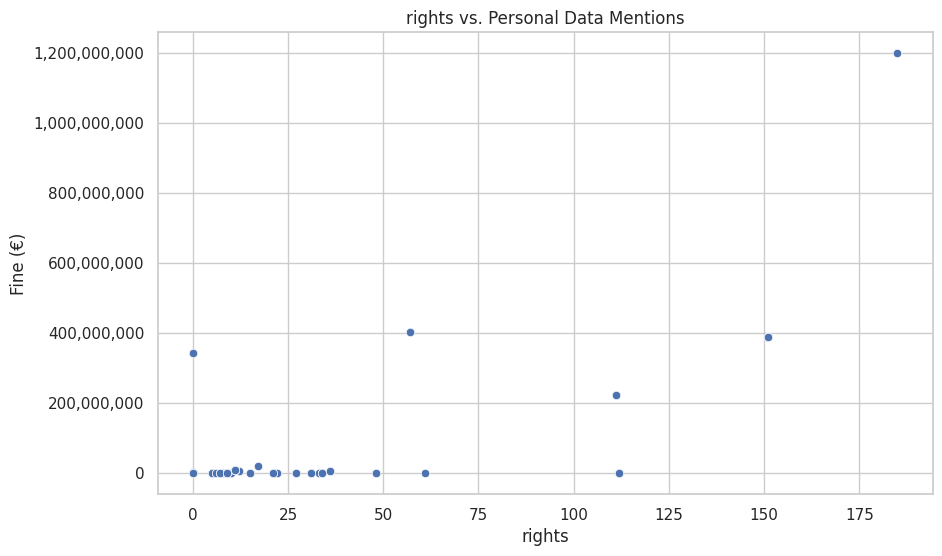

In [58]:
plt.figure(figsize=(10, 6))
# Create the scatter plot with Seaborn
scatter_plot = sns.scatterplot(data=merged_df, x='rights', y='Fine [€]')

# Format y-axis labels to display full numbers instead of scientific notation
scatter_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add a y-axis label
plt.ylabel('Fine (€)')

plt.title('rights vs. Personal Data Mentions')
plt.show()

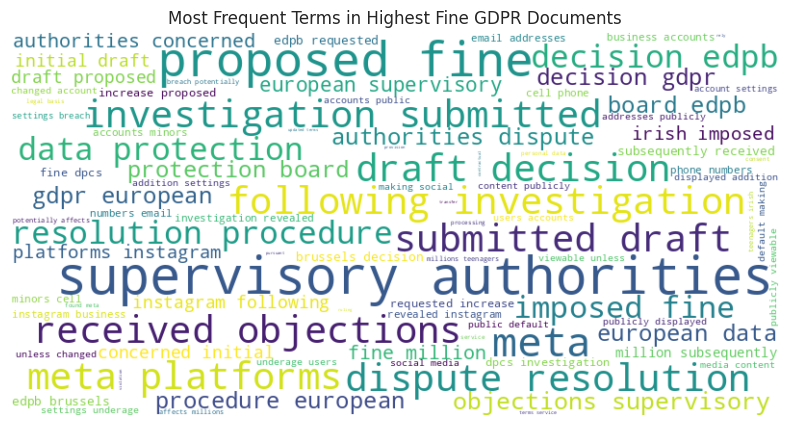

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Filter for highest fines
# Assuming 'merged_df' contains your fine and text data
highest_fines_df = merged_df.nlargest(10, 'Fine [€]') # Select top 10 based on Fine column

# 2. Combine text from highest fine documents
text_string = " ".join(highest_fines_df['Summary'].astype(str).tolist()) # Assuming 'Text' column holds the text

# 3. Preprocess text (clean, tokenize, etc.) if not already done
# This step is important to remove irrelevant words (stop words, punctuation) and improve visualization
# You might have functions like 'clean_text' from earlier parts of the code

cleaned_text = clean_text(text_string)  # Example assuming 'clean_text' function is available
text_string = " ".join(cleaned_text)

# 4. Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Terms in Highest Fine GDPR Documents")
plt.show()

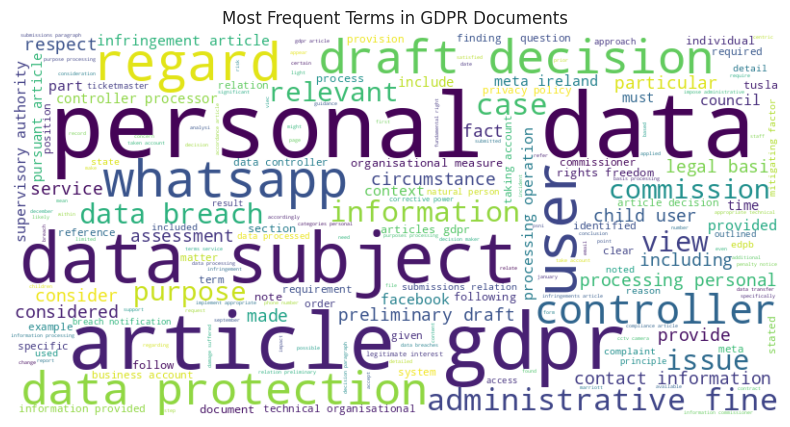

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `cleaned_text` contains your preprocessed text (no stopwords, lowercased, lemmatized)
# Correctly apply clean_text to each text in the texts dictionary
cleaned_texts = [clean_text(text) for text in texts.values()]
text_string = " ".join([" ".join(cleaned_text) for cleaned_text in cleaned_texts ])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Terms in GDPR Documents")
plt.show()

In [35]:
# 🧠 4. Topic modeling (LDA)
def perform_topic_modeling(texts, num_topics=8):
    tokenized_docs = [clean_text(text) for text in texts.values()]
    dictionary = corpora.Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(text) for text in tokenized_docs]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model.print_topics(), lda_model, corpus, dictionary

topics, lda_model, corpus, dictionary = perform_topic_modeling(texts)
for i, topic in topics:
    print(f"Topic {i}: {topic}")


Topic 0: 0.025*"data" + 0.020*"commissioner" + 0.015*"penalty" + 0.012*"gdpr" + 0.011*"personal" + 0.011*"article" + 0.009*"notice" + 0.007*"appropriate" + 0.007*"information" + 0.007*"processing"
Topic 1: 0.029*"data" + 0.018*"article" + 0.017*"gdpr" + 0.016*"meta" + 0.010*"decision" + 0.009*"ireland" + 0.008*"edpb" + 0.008*"personal" + 0.007*"measures" + 0.007*"protection"
Topic 2: 0.027*"data" + 0.021*"breach" + 0.020*"article" + 0.016*"personal" + 0.009*"submissions" + 0.009*"controller" + 0.007*"gdpr" + 0.007*"notification" + 0.007*"draft" + 0.006*"decision"
Topic 3: 0.030*"data" + 0.024*"council" + 0.014*"cctv" + 0.013*"personal" + 0.012*"section" + 0.012*"cameras" + 0.012*"article" + 0.011*"processing" + 0.011*"gdpr" + 0.007*"garda"
Topic 4: 0.026*"data" + 0.024*"whatsapp" + 0.019*"information" + 0.017*"article" + 0.011*"processing" + 0.010*"user" + 0.008*"submissions" + 0.008*"users" + 0.008*"personal" + 0.007*"provided"
Topic 5: 0.020*"gdpr" + 0.020*"article" + 0.019*"processi

In [74]:
# 📌 5. Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['ORG', 'NUM']]

for filename, text in texts.items():
    entities = extract_entities(text)
    top_entities = pd.Series([ent[0] for ent in entities]).value_counts().head(10)
    print(f"\n📄 {filename} → {top_entities.to_dict()}")



📄 ETid-752.pdf → {'GDPR': 23, 'ICO': 11, 'Groups': 10, 'Tribunal': 9, 'DPA': 8, 'Archiv e.Ii': 3, 'Times': 3, 'Archive': 3, 'the Sunday Times': 2, 'Arnhem House': 1}

📄 ETid-1190.pdf → {'Clearview': 127, 'the Clearview Database': 28, 'GDPR': 26, 'Probe Images': 12, 'Clearview Database': 7, 'DPA': 6, 'Tribunal': 6, 'IP': 5, 'Clearview’s': 5, 'Representations': 4}

📄 ETid-1422.pdf → {'ICO': 48, 'Easylife': 43, 'GDPR': 36, 'Tribunal': 9, 'DPA': 9, 'Health': 9, 'PECR': 7, 'LIA': 6, 'RAP': 5, 'Representations': 4}

📄 ETid-1696.pdf → {}

📄 ETid-1461.pdf → {'GDPR': 30, 'Incident': 17, 'DPA': 14, 'RAP': 13, 'Tribunal': 10, 'SMB': 7, 'EU': 7, 'c. Industry': 5, 'Interserve': 5, 'Ransomware': 4}

📄 ETid-485.pdf → {'TIC': 1186, 'Breach': 287, 'Commission': 226, 'the Preliminary Draft': 169, 'GDPR': 142, 'Twitter Inc.': 113, 'DPO': 111, 'Inquiry': 69, 'Twitter Inc.’s': 64, 'EU': 53}

📄 ETid-2032.pdf → {}

📄 ETid-1666.pdf → {'Centric': 239, 'GDPR': 47, 'DPC': 19, 'Inquiry': 13, 'EU': 12, 'CEN': 11,

In [87]:
# 📌 Modified NER Function: Return only entities to remove
def get_entities_to_remove(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'NUM']]

# 📌 Remove NER entities from text
def remove_entities(text, entities):
    for ent in entities:
        text = text.replace(ent, '')
    return text

# 📌 Process all documents
cleaned_texts = {}
for filename, text in texts.items():
    entities_to_remove = get_entities_to_remove(text)
    cleaned = remove_entities(text, entities_to_remove)
    cleaned_texts[filename] = cleaned

In [96]:
def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# Apply it to each cleaned text
for filename in cleaned_texts:
    cleaned_texts[filename] = normalize_whitespace(cleaned_texts[filename])

In [97]:
# 🧠 4. Topic modeling (LDA)
def perform_topic_modeling(texts, num_topics=8):
    tokenized_docs = [clean_text(text) for text in texts.values()]
    dictionary = corpora.Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(text) for text in tokenized_docs]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model.print_topics(), lda_model, corpus, dictionary

topics, lda_model, corpus, dictionary = perform_topic_modeling(cleaned_texts)
for i, topic in topics:
    print(f"Topic {i}: {topic}")

Topic 0: 0.021*"erson" + 0.017*"data" + 0.012*"risk" + 0.011*"breach" + 0.009*"infringement" + 0.008*"cision" + 0.008*"measures" + 0.008*"security" + 0.007*"infringements" + 0.007*"rocessing"
Topic 1: 0.025*"data" + 0.021*"article" + 0.011*"ireland" + 0.009*"decision" + 0.008*"aragrah" + 0.008*"ersonal" + 0.007*"rotection" + 0.007*"measures" + 0.006*"also" + 0.006*"order"
Topic 2: 0.022*"data" + 0.013*"ersonal" + 0.012*"ller" + 0.011*"breach" + 0.010*"relation" + 0.010*"notification" + 0.008*"rocessing" + 0.007*"information" + 0.007*"regard" + 0.006*"submissions"
Topic 3: 0.027*"data" + 0.011*"personal" + 0.010*"information" + 0.009*"penalty" + 0.008*"article" + 0.007*"processing" + 0.007*"icle" + 0.007*"commissioner" + 0.006*"security" + 0.006*"appropriate"
Topic 4: 0.003*"data" + 0.003*"participants" + 0.002*"decision" + 0.002*"group" + 0.002*"sessions" + 0.002*"violence" + 0.002*"personal" + 0.002*"processing" + 0.001*"facilitator" + 0.001*"recording"
Topic 5: 0.026*"data" + 0.019*"

In [98]:
import glob

# Adjust the folder path as needed
pdf_folder = "gdpr_pdfs"  # Update this!
pdf_files = glob.glob(os.path.join(pdf_folder, "*.pdf"))

In [99]:
# Assign dominant topic to each document
dominant_topics = []
filenames = list(texts.keys())  # assuming 'texts' is a dict {filename: text}

for i, bow in enumerate(corpus):
    topic_dist = lda_model.get_document_topics(bow)
    top_topic = max(topic_dist, key=lambda x: x[1])  # (topic_id, confidence)
    dominant_topics.append({
        "Filename": os.path.basename(filenames[i]).replace(".pdf", ""),
        "Dominant_Topic": top_topic[0],
        "Topic_Confidence": top_topic[1]
    })

# Convert to DataFrame
doc_topics_df = pd.DataFrame(dominant_topics)
doc_topics_df.set_index("Filename", inplace=True)

# Show result
print(doc_topics_df)
doc_topics_df.to_csv('doc_topics.csv')

           Dominant_Topic  Topic_Confidence
Filename                                   
ETid-752                3          0.999735
ETid-1190               3          0.982608
ETid-1422               3          0.999777
ETid-1696               0          0.125000
ETid-1461               3          0.999840
ETid-485                2          0.999972
ETid-2032               0          0.125000
ETid-1666               5          0.509182
ETid-278                5          0.495203
ETid-1578               5          0.999958
ETid-2555               3          0.999903
ETid-552                3          0.435974
ETid-893                4          0.625183
ETid-570                0          0.999932
ETid-2317               3          0.999697
ETid-1009               5          0.999950
ETid-440                3          0.999900
ETid-930                3          0.999784
ETid-1543               6          0.710214
ETid-1677               0          0.125000
ETid-1250               3       

In [100]:
merged = doc_topics_df.merge(metadata_df_cleaned, left_index=True, right_on='ETid', how='left')
merged.head()


,Dominant_Topic,Topic_Confidence,ETid,Country,Authority,Date of Decision,Fine [€],Controller/Processor,Sector,Quoted Art.,Type,Summary
81,3,0.999735,ETid-752,UNITED KINGDOM,Information Commissioner (ICO),44382,29000,Mermaids,Individuals and Private Associations,"[5 (1) f) GDPR, 32 (1), (2) GDPR]",Insufficient technical and organisational meas...,The ICO has fined transgender charity Mermaids...
77,3,0.982608,ETid-1190,UNITED KINGDOM,Information Commissioner (ICO),44699,9000000,Clearview Al Inc.,Industry and Commerce,"[5 (1) a), e) GDPR, 6 GDPR, 9 GDPR, 14 GDPR, 1...",Non-compliance with general data processing pr...,The UK DPA has fined Clearview AI Inc. EUR 9 m...
75,3,0.999777,ETid-1422,UNITED KINGDOM,Information Commissioner (ICO),44838,1547000,Easylife Ltd.,Industry and Commerce,"[5 (1) a) GDPR, 6 GDPR, 9 GDPR, 13 (1) c) GDPR...",Insufficient legal basis for data processing,"The UK DPA has imposed a fine of EUR 1,547,000..."
92,0,0.125000,ETid-1696,IRELAND,Data Protection Authority of Ireland,44984,750000,Bank of Ireland 365,"Finance, Insurance and Consulting","[5 (1) f) GDPR, 32 (1) GDPR]",Insufficient technical and organisational meas...,The Irish DPA has fined Bank of Ireland 365 EU...
74,3,0.999840,ETid-1461,UNITED KINGDOM,Information Commissioner (ICO),44853,5033000,Interserve Group Limited,Industry and Commerce,"[5 (1) f) GDPR, 32 GDPR]",Insufficient technical and organisational meas...,The British DPA has fined the construction gro...


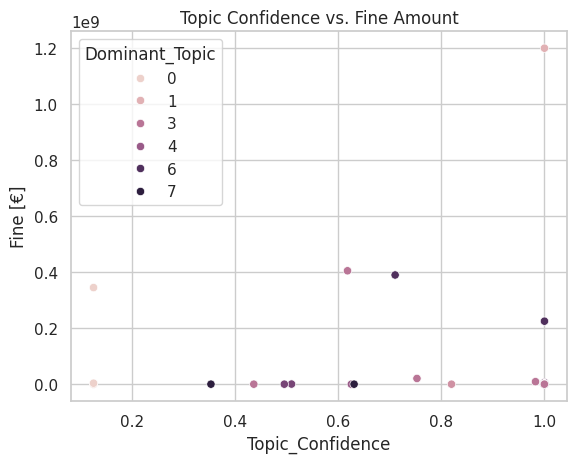

In [101]:
# Assuming 'merged_df' contains your data
sns.scatterplot(data=merged, x='Topic_Confidence', y='Fine [€]', hue='Dominant_Topic')
plt.title('Topic Confidence vs. Fine Amount')
plt.show()

In [109]:
import scipy.stats as stats

# Assuming 'confidence_scores' and 'fine_amounts' are arrays
correlation, p_value = stats.pearsonr( merged['Topic_Confidence'], merged['Fine [€]'])
print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: 0.009001658247153127, p-value: 0.9603474068099692


In [94]:
# Assuming 'merged_df' contains your data
grouped_df = merged.groupby(['Dominant_Topic', pd.cut(merged['Topic_Confidence'], bins=2, labels=['Low', 'High'])])['Fine [€]'].mean()
print(grouped_df)

Dominant_Topic  Topic_Confidence
0               Low                 6.986700e+07
                High                2.885000e+05
1               Low                 4.050000e+08
                High                2.304154e+06
2               Low                 9.000000e+06
                High                2.750000e+06
3               Low                          NaN
                High                1.100000e+05
4               Low                 1.500000e+03
                High                3.900000e+08
5               Low                          NaN
                High                6.002250e+08
6               Low                          NaN
                High                2.250000e+04
7               Low                          NaN
                High                2.250000e+08
Name: Fine [€], dtype: float64


<ipython-input-94-48302813e0f6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = merged.groupby(['Dominant_Topic', pd.cut(merged['Topic_Confidence'], bins=2, labels=['Low', 'High'])])['Fine [€]'].mean()


/usr/local/lib/python3.11/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.11/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


LDA Model Coherence: nan
Random Baseline Coherence: nan


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


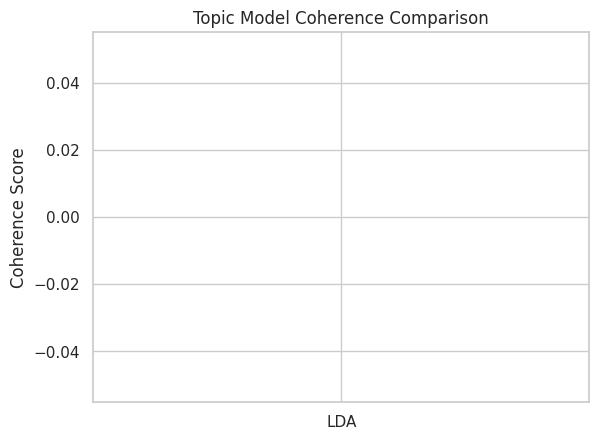

In [95]:
import numpy as np
from gensim.models import CoherenceModel

# Assuming you have already:
# - 'lda_model': Your trained LDA model
# - 'corpus': Your document-term matrix
# - 'dictionary': Your vocabulary dictionary
# - 'texts': Your original document texts (dict)

# 1. Random Topic Assignment
num_topics = lda_model.num_topics
num_documents = len(corpus)
random_topics = np.random.randint(0, num_topics, num_documents)

# 2. Calculate Coherence for LDA Model
lda_coherence_model = CoherenceModel(model=lda_model, texts=list(texts.values()), dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()

# 3. Calculate Coherence for Random Baseline
# Create a dummy model with random topic assignments and a get_topics method
class RandomTopicModel:
    def __init__(self, num_topics, random_topics):
        self.num_topics = num_topics
        self.random_topics = random_topics

    def get_document_topics(self, bow, minimum_probability=None):
        doc_id = bow[0][0] if isinstance(bow, list) and bow else 0 # Handle different bow formats

        topic_id = self.random_topics[doc_id % len(self.random_topics)] # Ensure doc_id is within bounds
        return [(topic_id, 1.0)]  # Assign probability 1.0 to the random topic

    def get_topics(self):
        # Return a list of topics, each represented as a list of (word_id, probability) tuples.
        # Since this is a random model, we'll just return empty topics.
        return [[] for _ in range(self.num_topics)]

random_topic_model = RandomTopicModel(num_topics, random_topics)
random_coherence_model = CoherenceModel(model=random_topic_model, texts=list(texts.values()), dictionary=dictionary, coherence='c_v')
random_coherence = random_coherence_model.get_coherence()

# 4. Compare Coherence Scores
print(f"LDA Model Coherence: {lda_coherence}")
print(f"Random Baseline Coherence: {random_coherence}")

# You can further visualize the comparison:
import matplotlib.pyplot as plt
plt.bar(['LDA', 'Random'], [lda_coherence, random_coherence])
plt.title('Topic Model Coherence Comparison')
plt.ylabel('Coherence Score')
plt.show()